In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
from datasets import load_dataset
data = pd.read_csv('https://lukeb.co/python_csv')
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else(x))

In [3]:
df_DA_US = df[(df['job_title_short']== 'Data Analyst') & (df['job_country']== 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_explode = df_DA_US.explode('job_skills')
df_skill = df_DA_US_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending= False)
df_skill = df_skill.rename(columns={'count':'skill count', 'median':'median salary'})

df_skill

,skill count,median salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [15]:
job_count = len(df_DA_US)

job_count

4350

In [24]:
df_skill['skill percent'] = (df_skill['skill count'] / job_count)*100

skill_percent = 5
df_skill_percent = df_skill[df_skill['skill percent'] > skill_percent]

In [25]:
df_skill_percent

,skill count,median salary,skill percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


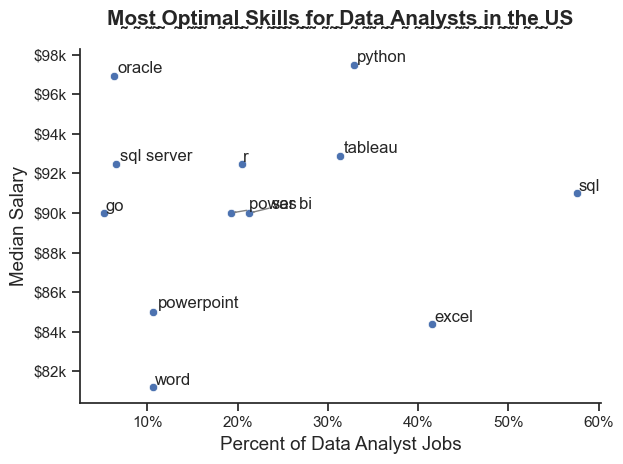

In [26]:
from adjustText import adjust_text
sns.scatterplot(data= df_skill_percent, x= 'skill percent', y= 'median salary')
sns.set_theme(style='ticks')
texts=[]
for i, txt in enumerate(df_skill_percent.index):
    texts.append(plt.text(df_skill_percent['skill percent'].iloc[i], df_skill_percent['median salary'].iloc[i], txt ))

adjust_text(texts, arrowprops = dict(arrowstyle = '->', lw= 1, color = 'grey' ))
sns.despine()
plt.xlabel('Percent of Data Analyst Jobs', fontsize = 13.5)
plt.ylabel('Median Salary', fontsize = 13.5)
plt.title('\u0330'.join('Most Optimal Skills for Data Analysts in the US'), pad= 17, fontsize = 15, fontweight = 'bold' )
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.0f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
plt.tight_layout()
plt.show()

In [46]:
df_technology = df_DA_US['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  
    for key, value in row_dict.items():
        if key in technology_dict:  
            technology_dict[key] += value
        else:                      
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

df_technology = pd.DataFrame(technology_dict.items(), columns=['technology', 'job_skills'])
df_technology = df_technology.explode('job_skills')

df_technology


,technology,job_skills
0,analyst_tools,excel
0,analyst_tools,qlik
0,analyst_tools,ms access
0,analyst_tools,microstrategy
0,analyst_tools,spss
...,...,...
9,sync,symphony
9,sync,unify
9,sync,slack
9,sync,twilio


In [47]:
df_DA_skills = df_skill_percent.merge(df_technology, how= 'left', on= 'job_skills')
df_DA_skills

,job_skills,skill count,median salary,skill percent,technology
0,sql,2508,91000.00,57.655172,programming
1,excel,1808,84392.00,41.563218,analyst_tools
2,python,1431,97500.00,32.896552,programming
3,tableau,1364,92875.00,31.356322,analyst_tools
4,sas,926,90000.00,21.287356,analyst_tools
5,sas,926,90000.00,21.287356,programming
6,r,893,92500.00,20.528736,programming
7,power bi,838,90000.00,19.264368,analyst_tools
8,powerpoint,462,85000.00,10.620690,analyst_tools
9,word,461,81194.75,10.597701,analyst_tools


4 [-0.35784721  0.1164193 ]
5 [-0.45215236  0.36739928]


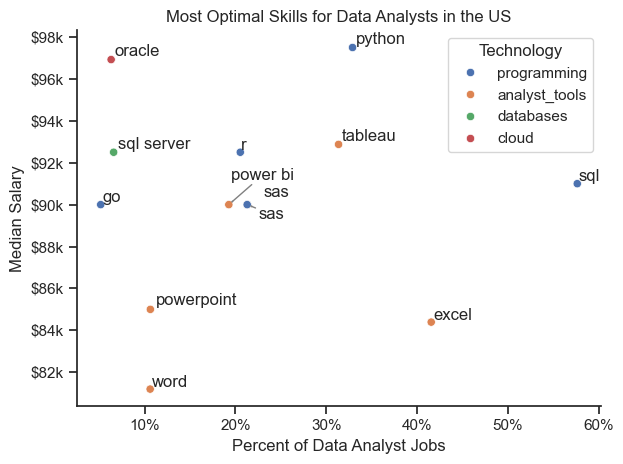

In [50]:
sns.scatterplot(data= df_DA_skills, x='skill percent', y='median salary', hue='technology')
sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_DA_skills['job_skills']):
    texts.append(plt.text(df_DA_skills['skill percent'].iloc[i], df_DA_skills['median salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.0f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
plt.tight_layout()
plt.show()